<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-20 04:15:33--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22722 (22K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  22.19K  --.-KB/s    in 0.001s  

2021-05-20 04:15:33 (17.1 MB/s) - ‘data_phot.csv’ saved [22722/22722]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375
...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403


In [8]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,0.662431,-0.651813,0.005309


In [76]:
#GENERATE
data_sample = []
data_sample = pd.DataFrame(data_sample)

#seed(12)
for i in range(208) :
  data_sample[i] = np.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4) 
  
 

In [77]:
data_sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,192.952073,106.527594,40.706240,148.666456,201.825247,111.973282,144.102006,45.524022,172.704157,23.996997,110.169636,178.809451,202.464320,139.267115,163.797377,83.718833,27.730002,45.276019,100.475542,41.655470,92.929810,194.446876,111.369139,152.287050,53.110019,157.373756,154.261907,66.222345,148.854234,474.472502,134.703182,113.806227,193.325909,98.350152,109.550010,91.618929,78.446388,261.388249,71.056134,124.093360,...,312.702278,97.819435,92.832978,244.482060,109.751448,132.835869,144.042581,231.209999,144.061978,132.851245,51.680944,187.965048,316.862157,60.037434,85.436715,157.857671,134.810306,192.368696,97.097890,173.527389,58.284594,183.767304,190.332110,107.873814,101.517783,64.128155,219.857554,159.108275,217.555141,141.891601,301.444785,121.699022,162.904096,249.018022,80.201502,75.954506,199.367944,68.306722,79.899866,126.617552
1,192.922668,106.502563,40.706214,148.689082,201.861105,111.968455,144.104952,45.523957,172.668440,23.997044,110.160160,178.818513,202.421925,139.249245,163.713623,83.718328,27.729657,45.275978,100.475073,41.655536,92.933699,194.430458,111.368487,152.335696,53.111449,157.398159,154.261480,66.221106,148.835203,474.084918,134.650004,113.824780,192.717235,98.356191,109.547082,91.636688,78.446578,261.397993,71.052534,124.090508,...,316.675360,97.847905,92.828484,244.425045,109.749075,132.835464,144.042430,231.206809,144.078372,132.846793,51.680781,188.032255,317.037166,60.037157,85.438080,157.835648,134.805348,192.330427,97.096975,173.533473,58.282953,183.679359,190.288422,107.878709,101.479068,64.370877,219.908163,159.116519,217.532893,141.892090,301.340004,121.700850,162.901907,249.151284,80.202133,75.956169,199.506200,68.308346,79.894172,126.613646
2,193.025836,106.544095,40.706320,148.670311,201.824466,111.964534,144.100366,45.524167,172.697360,23.997045,110.170145,178.897037,202.371831,139.248050,163.748208,83.718709,27.730216,45.276003,100.477831,41.655684,92.936639,194.469999,111.369028,152.219516,53.111268,157.357229,154.258115,66.220419,148.805509,474.426036,134.913624,113.821757,194.791138,98.354772,109.545268,91.627326,78.446803,261.282421,71.056420,124.095451,...,315.182384,97.836984,92.837524,244.449397,109.751977,132.836818,144.091977,231.225328,144.071065,132.848996,51.680724,187.995280,317.019537,60.037886,85.439650,157.852490,134.868073,192.375419,97.096336,173.534634,58.284001,183.933968,190.328442,107.876328,101.577489,64.532063,219.845750,159.132205,217.524695,141.899017,301.531687,121.703938,162.889571,249.245487,80.201728,75.955579,199.434320,68.306965,79.895154,126.615717
3,192.994701,106.502933,40.706348,148.671030,201.814093,111.972113,144.105797,45.524184,172.690726,23.997035,110.175731,178.864219,202.386567,139.248606,163.743572,83.716278,27.730129,45.275913,100.476564,41.655766,92.933706,194.467586,111.369491,152.358816,53.109107,157.371036,154.259735,66.221943,148.793243,474.583461,134.870276,113.821572,192.686172,98.357626,109.551951,91.622330,78.446415,261.260630,71.056562,124.087925,...,314.045402,97.838432,92.841593,244.400178,109.753623,132.835538,144.064426,231.209977,144.055174,132.854722,51.681088,187.985796,316.982894,60.037879,85.438352,157.827625,134.852185,192.314983,97.093093,173.525578,58.283392,183.871798,190.265305,107.874221,101.485004,64.330529,219.872383,159.122584,217.500132,141.884554,301.335358,121.692121,162.883992,249.163921,80.202280,75.954916,199.550962,68.307927,79.889352,126.623853
4,192.894607,106.532529,40.706382,148.672527,201.843694,111.968148,144.098238,45.523929,172.640005,23.997066,110.160063,178.879934,202.377084,139.213582,163.736710,83.717842,27.729780,45.275928,100.477352,41.655436,92.933816,194.468722,111.369462,152.270382,53.108876,157.380651,154.26

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


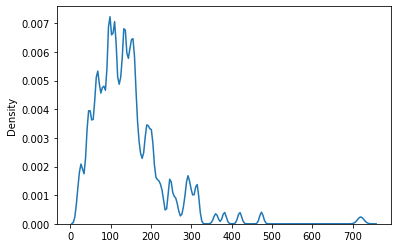

In [78]:
sns.distplot(data_sample , hist=False)

In [79]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_K[i]

M()

In [80]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [81]:
print(M_r)
print(M_J)
print(M_K)

          0          1          2     ...       9997       9998       9999
0    10.501208  10.501539  10.500378  ...  10.500868  10.501881  10.500997
1    13.622483  13.622993  13.622147  ...  13.621923  13.622182  13.622315
2    11.890476  11.890477  11.890472  ...  11.890475  11.890472  11.890471
3    10.834297  10.833967  10.834241  ...  10.833966  10.834198  10.833910
4     9.878805   9.878419   9.878813  ...   9.878208   9.878235   9.878484
..         ...        ...        ...  ...        ...        ...        ...
203  10.794063  10.794016  10.794033  ...  10.794059  10.794049  10.794040
204  11.458424  11.456919  11.457701  ...  11.457938  11.456452  11.457653
205  12.135135  12.135084  12.135128  ...  12.135125  12.135101  12.135086
206  14.254716  14.254870  14.254844  ...  14.254897  14.254698  14.254750
207  11.202500  11.202567  11.202531  ...  11.202420  11.202242  11.202194

[208 rows x 10000 columns]
         0         1         2     ...      9997      9998      9999
0  

In [ ]:
M_r.to_csv("M_r_phot.csv")
M_J.to_csv("M_J_phot.csv")
M_K.to_csv("M_K_phot.csv")